# 01 - Kanton Zürich Boundary
### Author: Daniel Herrera-Russert
#### February 04, 2025

In [8]:
# !pip install geopandas requests

In [7]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import zipfile
from pathlib import Path
import json

## 1. Loading the dataset

The [**SwissBOUNDARIES3D**](https://opendata.swiss/en/dataset/swissboundaries3d-kantonsgrenzen) dataset, provided by the **Federal Office of Topography (swisstopo)**, contains high-precision vector geometries of Switzerland’s administrative boundaries. It includes the **national, cantonal, district, and municipal boundaries** in a **three-dimensional (3D) format**, making it suitable for GIS applications, mapping, and spatial analysis. The dataset is updated regularly to reflect administrative changes and is available in various coordinate reference systems (e.g., **LV95 - EPSG:2056** and **WGS84 - EPSG:4326**). Users can access and download the data through **opendata.swiss**, ensuring transparency and accessibility for research, urban planning, and government use.

SwissBOUNDARIES3D works by providing structured boundary data in **vector formats such as Shapefile (SHP), GeoJSON, and GML**, allowing easy integration into **GIS software like QGIS, ArcGIS, and Python-based tools**. The dataset is delivered via web services such as **WMS and WFS**, enabling dynamic access to boundary layers without needing local storage. It supports detailed cartographic representation, including hierarchical levels (e.g., canton vs. municipality) and topological consistency. The dataset plays a crucial role in **spatial analysis, land-use planning, and geospatial decision-making** across Switzerland.

The following script **downloads, processes, and visualizes** the **Canton of Zürich's boundary** from an official **Swiss WMS/WFS service**. It first sends a **GET request** to the **geo.admin.ch API** to retrieve the boundary in **GeoJSON format**. The response is then **saved locally** as `"data/raw/zh_boundary.geojson"`, ensuring that the data is accessible for further analysis.

In [4]:
# URL of the GeoJSON file
geojson_url = "https://api3.geo.admin.ch/rest/services/api/MapServer/ch.swisstopo.swissboundaries3d-kanton-flaeche.fill/1?geometryFormat=geojson&sr=4326"

# Define output file path
output_geojson = "../data/raw/zh_boundary.geojson"

# Fetch the GeoJSON data
response = requests.get(geojson_url)

# Save to file
if response.status_code == 200:
    with open(output_geojson, "wb") as f:
        f.write(response.content)
    print(f"✅ Zürich boundary saved as '{output_geojson}'")
else:
    print("❌ Failed to download GeoJSON data.")

# Load into GeoPandas
gdf = gpd.read_file(output_geojson)

# Print CRS (coordinate system)
print(f"🗺️ Coordinate System: {gdf.crs}")

✅ Zürich boundary saved as '../data/raw/zh_boundary.geojson'
🗺️ Coordinate System: EPSG:4326


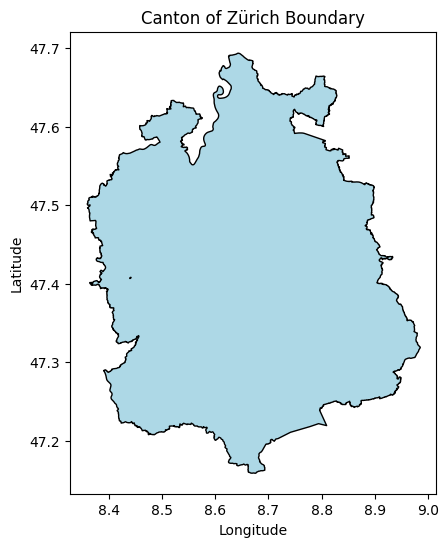

In [3]:
# Quick visualization
gdf.plot(edgecolor="black", facecolor="lightblue", figsize=(6,6))
plt.title("Canton of Zürich Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

---

## 2. Evaluate point with a geographical query

### 2.1. Checking if a Point is Within the Canton of Zürich

This script demonstrates how to verify whether a user-input geographical point falls within the **Canton of Zürich** using **GeoPandas** and **Shapely**. The script first loads a **GeoJSON file** containing Zürich's boundary and ensures it is in the correct **WGS84 coordinate system (`EPSG:4326`)**. It then prompts the user to input latitude and longitude values. These coordinates are converted into a **Shapely Point object**, which is checked against the Zürich boundary using **spatial containment analysis** (`.contains()`). 

If the point is inside the canton, the script prints a confirmation message and **plots the Zürich boundary along with the user's point**. The **canton outline is displayed in light blue**, and the user’s location appears as a **red marker**. If the point is outside the boundary, a message stating `"❌ Invalid location!"` is displayed without generating a plot.

**Sample coordinates**:

| Status  | Latitude  | Longitude |
|---------|----------|-----------|
| Within the boundaries   | 47.3769  | 8.5417    |
| Outside of the boundaries | 46.2044  | 6.1432    |

Enter latitude:  47.3769
Enter longitude:  8.5417


✅ The point is within the Canton of Zürich


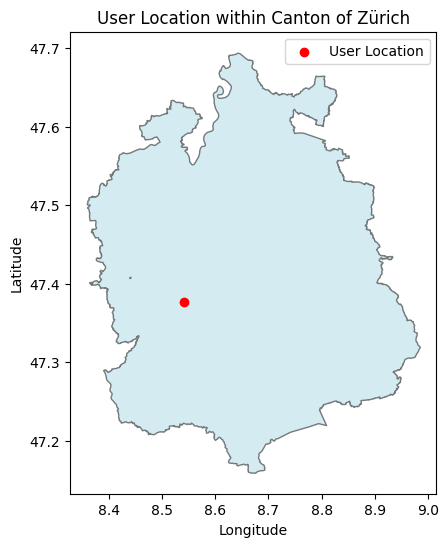

In [4]:
# Load the Zürich boundary GeoJSON
boundary_gdf = gpd.read_file("../data/raw/zh_boundary.geojson")

# Ensure it's in the correct CRS (WGS 84 - EPSG:4326)
boundary_gdf = boundary_gdf.to_crs("EPSG:4326")

# Get user input coordinates
lat = float(input("Enter latitude: "))
lon = float(input("Enter longitude: "))

# Create a point from user input
user_point = Point(lon, lat)

# Check if the point is inside the Zürich boundary
if boundary_gdf.contains(user_point).any():
    print("✅ The point is within the Canton of Zürich")

    # Plot Zürich boundary and the user point
    fig, ax = plt.subplots(figsize=(6, 6))
    boundary_gdf.plot(ax=ax, edgecolor="black", facecolor="lightblue", alpha=0.5)
    ax.scatter(lon, lat, color="red", marker="o", label="User Location", zorder=3)
    
    # Labels and formatting
    plt.title("User Location within Canton of Zürich")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()
else:
    print("❌ Invalid location!")

### 2.2. Checking if a Point is Within the Canton of Zürich with Coordinate Conversion

The following revised version introduces **coordinate system conversion** to improve spatial accuracy in Swiss mapping, and also provide compatibility with the other datasets that are handled in the project. While the user still enters latitude and longitude in the **WGS84 system (`EPSG:4326`)**, the script now **converts both the Zürich boundary and the input coordinates to the Swiss LV95 system (`EPSG:2056`)** before performing the spatial query. This ensures **higher precision** when checking if the point is inside the canton.

After the containment check, the script **transforms the data back to WGS84 (`EPSG:4326`)** for visualization. This update ensures that **all spatial operations occur in the appropriate Swiss coordinate system (LV95)** while still allowing users to interact with the script using standard latitude/longitude inputs. The resulting map remains the same but now benefits from a more **accurate and GIS-standardized approach**.

**Sample coordinates**:

| Status  | Latitude  | Longitude |
|---------|----------|-----------|
| Within the boundaries   | 47.3769  | 8.5417    |
| Outside of the boundaries | 46.2044  | 6.1432    |

In [ ]:
# Load the Zürich boundary GeoJSON
boundary_gdf = gpd.read_file("../data/raw/zh_boundary.geojson")

# Convert Zürich boundary to LV95 (Swiss Coordinate System)
boundary_gdf = boundary_gdf.to_crs("EPSG:2056")

# Get user input coordinates in WGS84
lat = float(input("Enter latitude (WGS84): "))
lon = float(input("Enter longitude (WGS84): "))

# Convert user coordinates from WGS84 to LV95
wgs84_to_lv95 = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:2056", always_xy=True)
lv95_x, lv95_y = wgs84_to_lv95.transform(lon, lat)

# Create a point in LV95
user_point_lv95 = Point(lv95_x, lv95_y)

# Check if the LV95 point is inside the Zürich boundary
if boundary_gdf.contains(user_point_lv95).any():
    print("✅ The point is within the Canton of Zürich")

    # Convert the Zürich boundary back to WGS84 for plotting
    boundary_gdf = boundary_gdf.to_crs("EPSG:4326")

    # Convert LV95 point back to WGS84 for plotting
    lv95_to_wgs84 = pyproj.Transformer.from_crs("EPSG:2056", "EPSG:4326", always_xy=True)
    lon_wgs84, lat_wgs84 = lv95_to_wgs84.transform(lv95_x, lv95_y)

    # Plot Zürich boundary and the user point
    fig, ax = plt.subplots(figsize=(6, 6))
    boundary_gdf.plot(ax=ax, edgecolor="black", facecolor="lightblue", alpha=0.5)
    ax.scatter(lon_wgs84, lat_wgs84, color="red", marker="o", label="User Location", zorder=3)

    # Labels and formatting
    plt.title("User Location within Canton of Zürich")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()
else:
    print("❌ Invalid location!")

---

## 3. ZH Bezirke

In [21]:
import requests
import zipfile
import io

url = "https://data.geo.admin.ch/ch.swisstopo.swissboundaries3d/swissboundaries3d_2025-04/swissboundaries3d_2025-04_2056_5728.shp.zip"

response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"❌ Failed to download: {response.status_code}")
print("✅ ZIP downloaded.")

# Preview contents
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    file_list = z.namelist()
    print("📁 Files in ZIP:")
    for f in file_list:
        print(f)


✅ ZIP downloaded.
📁 Files in ZIP:
swissBOUNDARIES3D_1_5_TLM_BEZIRKSGEBIET.cpg
swissBOUNDARIES3D_1_5_TLM_BEZIRKSGEBIET.dbf
swissBOUNDARIES3D_1_5_TLM_BEZIRKSGEBIET.prj
swissBOUNDARIES3D_1_5_TLM_BEZIRKSGEBIET.shp
swissBOUNDARIES3D_1_5_TLM_BEZIRKSGEBIET.shx
swissBOUNDARIES3D_1_5_TLM_HOHEITSGEBIET.cpg
swissBOUNDARIES3D_1_5_TLM_HOHEITSGEBIET.dbf
swissBOUNDARIES3D_1_5_TLM_HOHEITSGEBIET.prj
swissBOUNDARIES3D_1_5_TLM_HOHEITSGEBIET.shp
swissBOUNDARIES3D_1_5_TLM_HOHEITSGEBIET.shx
swissBOUNDARIES3D_1_5_TLM_HOHEITSGRENZE.cpg
swissBOUNDARIES3D_1_5_TLM_HOHEITSGRENZE.dbf
swissBOUNDARIES3D_1_5_TLM_HOHEITSGRENZE.prj
swissBOUNDARIES3D_1_5_TLM_HOHEITSGRENZE.shp
swissBOUNDARIES3D_1_5_TLM_HOHEITSGRENZE.shx
swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.cpg
swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.dbf
swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.prj
swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp
swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shx
swissBOUNDARIES3D_1_5_TLM_LANDESGEBIET.cpg
swissBOUNDARIES3D_1_5_TLM_LANDESGEBIET.dbf


In [27]:
import requests
import zipfile
import io
import geopandas as gpd
import tempfile
import os
import matplotlib.pyplot as plt

In [33]:
# URL to official Swisstopo ZIP (2025 Bezirke in EPSG:2056)
url = "https://data.geo.admin.ch/ch.swisstopo.swissboundaries3d/swissboundaries3d_2025-04/swissboundaries3d_2025-04_2056_5728.shp.zip"

# Download the ZIP file in memory
response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"❌ Failed to download: {response.status_code}")
print("✅ ZIP downloaded in memory.")

# Extract Bezirke shapefile and load it
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with tempfile.TemporaryDirectory() as tmpdir:
        z.extractall(tmpdir)

        # Find the Bezirke shapefile
        bezirk_path = None
        for root, _, files in os.walk(tmpdir):
            for file in files:
                if file.endswith(".shp") and "BEZIRKSGEBIET" in file:
                    bezirk_path = os.path.join(root, file)

        if not bezirk_path:
            raise FileNotFoundError("❌ Bezirke shapefile not found.")

        # Load Bezirke layer
        bezirke = gpd.read_file(bezirk_path)

# Filter for Kanton Zürich using KANTONSNUM == 1
if "KANTONSNUM" in bezirke.columns:
    zh_bezirke = bezirke[bezirke["KANTONSNUM"] == 1]
    print(f"✅ Found {len(zh_bezirke)} Bezirke in Zürich.")
else:
    raise KeyError("❌ Column 'KANTONSNUM' not found. Available columns: ", bezirke.columns)

# Save to GeoJSON
output_path = "../data/raw/zh_bezirke.geojson"
zh_bezirke.to_file(output_path, driver="GeoJSON")
print(f"✅ Saved Zürich Bezirke to {output_path}")

zh_bezirke.head()

✅ ZIP downloaded in memory.
✅ Found 12 Bezirke in Zürich.
✅ Saved Zürich Bezirke to ../data/raw/zh_bezirke.geojson


,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,HERKUNFT_M,REVISION_J,...,REVISION_Q,OBJEKTART,BEZIRKSNUM,SEE_FLAECH,BEZIRKSFLA,NAME,KANTONSNUM,ICC,EINWOHNERZ,geometry
1,{05193CBD-54B4-4F3D-92B7-7CA8F1FA27A2},2015-12-08,2012-10-26,2012,10,Verbessert,AV,2015,12,2025,...,TGMG_2025_Akt,Bezirk,108,0,16315,Pfäffikon,1,CH,63033,"POLYGON Z ((2699610.939 1245143.54 570.563, 26..."
3,{CC33E93B-74FE-44BF-9005-E76A245AB8B9},2022-11-16,2012-10-26,2012,10,Verbessert,AV,2023,1,2025,...,TGMG_2025_Akt,Bezirk,107,0,8463,Meilen,1,CH,108710,"POLYGON Z ((2685056.895 1244517.809 405.85, 26..."
23,{85DAB265-67EC-4F0B-9B9E-3BE39B097174},2015-12-08,2012-10-26,2012,10,Verbessert,AV,2015,12,2025,...,TGMG_2025_Akt,Bezirk,104,0,15285,Dielsdorf,1,CH,95157,"POLYGON Z ((2669501.771 1262558.645 437.356, 2..."
24,{85FB267E-985D-4D4E-8D06-56FD1B50848C},2016-12-09,2012-10-26,2012,10,Verbessert,swisstopo,2017,1,2025,...,TGMG_2025_Akt,Bezirk,103,0,18488,Bülach,1,CH,164131,"POLYGON Z ((2684250.582 1253916.885 440.51, 26..."
34,{69706755-DBB7-45D4-A424-5B9EC36F4D33},2015-12-08,2012-10-26,2012,10,Verbessert,AV,2015,12,2025,...,TGMG_2025_Akt,Bezirk,112,395,9188,Zürich,1,CH,433989,"POLYGON Z ((2680480.755 1241584.105 748.394, 2..."


In [42]:
print(zh_bezirke["OBJEKTART"].unique())

['Bezirk']


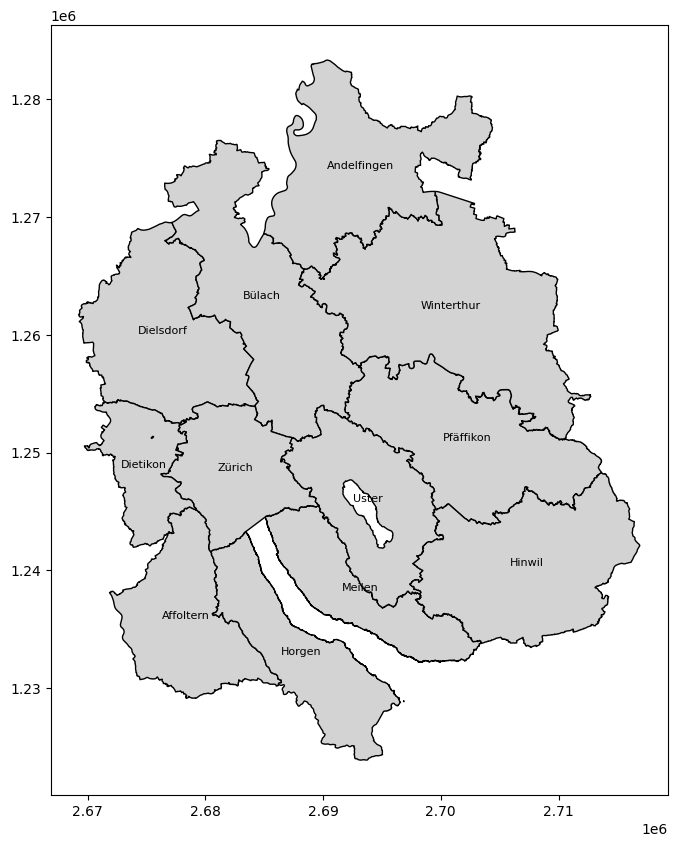

In [34]:
zh_bezirke = gpd.read_file("../data/raw/zh_bezirke.geojson").to_crs("EPSG:2056") 

# Plot Zürich Bezirke
fig, ax = plt.subplots(figsize=(10, 10))
zh_bezirke.plot(ax=ax, edgecolor="black", facecolor="lightgray")

# Optional: Add district name labels
for _, row in zh_bezirke.iterrows():
    ax.annotate(row["NAME"], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                fontsize=8, ha="center", color="black")

---

## 4. ZH Gemeinden

In [39]:
# URL to January 2025 SHP ZIP
url = "https://data.geo.admin.ch/ch.swisstopo.swissboundaries3d/swissboundaries3d_2025-01/swissboundaries3d_2025-01_2056_5728.shp.zip"

# Download ZIP in memory
response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"❌ Download failed: {response.status_code}")
print("✅ ZIP downloaded.")

# List contents
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    print("📂 Files in ZIP:")
    for f in z.namelist():
        print(f)

✅ ZIP downloaded.
📂 Files in ZIP:
swissBOUNDARIES3D_1_5_TLM_BEZIRKSGEBIET.cpg
swissBOUNDARIES3D_1_5_TLM_BEZIRKSGEBIET.dbf
swissBOUNDARIES3D_1_5_TLM_BEZIRKSGEBIET.prj
swissBOUNDARIES3D_1_5_TLM_BEZIRKSGEBIET.shp
swissBOUNDARIES3D_1_5_TLM_BEZIRKSGEBIET.shx
swissBOUNDARIES3D_1_5_TLM_HOHEITSGEBIET.cpg
swissBOUNDARIES3D_1_5_TLM_HOHEITSGEBIET.dbf
swissBOUNDARIES3D_1_5_TLM_HOHEITSGEBIET.prj
swissBOUNDARIES3D_1_5_TLM_HOHEITSGEBIET.shp
swissBOUNDARIES3D_1_5_TLM_HOHEITSGEBIET.shx
swissBOUNDARIES3D_1_5_TLM_HOHEITSGRENZE.cpg
swissBOUNDARIES3D_1_5_TLM_HOHEITSGRENZE.dbf
swissBOUNDARIES3D_1_5_TLM_HOHEITSGRENZE.prj
swissBOUNDARIES3D_1_5_TLM_HOHEITSGRENZE.shp
swissBOUNDARIES3D_1_5_TLM_HOHEITSGRENZE.shx
swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.cpg
swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.dbf
swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.prj
swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp
swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shx
swissBOUNDARIES3D_1_5_TLM_LANDESGEBIET.cpg
swissBOUNDARIES3D_1_5_TLM_LANDESGEBIET.dbf


In [43]:
# URL to official Swisstopo ZIP (April 2025 release, SHP format, LV95)
url = "https://data.geo.admin.ch/ch.swisstopo.swissboundaries3d/swissboundaries3d_2025-04/swissboundaries3d_2025-04_2056_5728.shp.zip"

# Download ZIP in memory
response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"❌ Failed to download: {response.status_code}")
print("✅ ZIP downloaded in memory.")

# Extract and load HOHEITSGEBIET layer
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with tempfile.TemporaryDirectory() as tmpdir:
        z.extractall(tmpdir)

        # Find HOHEITSGEBIET shapefile
        hoheits_path = None
        for root, _, files in os.walk(tmpdir):
            for file in files:
                if file.endswith(".shp") and "HOHEITSGEBIET" in file:
                    hoheits_path = os.path.join(root, file)

        if not hoheits_path:
            raise FileNotFoundError("❌ HOHEITSGEBIET shapefile not found.")

        # Load layer into GeoPandas
        hoheitsgebiet = gpd.read_file(hoheits_path)

# Print column names for inspection
print("📋 Columns in HOHEITSGEBIET layer:")
print(hoheitsgebiet.columns.tolist())

✅ ZIP downloaded in memory.
📋 Columns in HOHEITSGEBIET layer:
['UUID', 'DATUM_AEND', 'DATUM_ERST', 'ERSTELL_J', 'ERSTELL_M', 'GRUND_AEND', 'HERKUNFT', 'HERKUNFT_J', 'HERKUNFT_M', 'REVISION_J', 'REVISION_M', 'REVISION_Q', 'OBJEKTART', 'BFS_NUMMER', 'BEZIRKSNUM', 'KANTONSNUM', 'NAME', 'GEM_FLAECH', 'SEE_FLAECH', 'ICC', 'SHN', 'EINWOHNERZ', 'HIST_NR', 'geometry']


In [44]:
print(hoheitsgebiet["OBJEKTART"].unique())

['Gemeindegebiet' 'Kantonsgebiet' 'Kommunanz']


In [49]:
# Filter for Gemeindegebiet
gemeinden = hoheitsgebiet[hoheitsgebiet["OBJEKTART"] == "Gemeindegebiet"]

# Filter for Zürich (KANTONSNUM == 1)
zh_gemeinden = gemeinden[gemeinden["KANTONSNUM"] == 1]
print(f"✅ Found {len(zh_gemeinden)} Gemeinden in Zürich.")

# Save to GeoJSON
output_path = "../data/raw/zh_gemeinden.geojson"
zh_gemeinden.to_file(output_path, driver="GeoJSON")
print(f"✅ Saved Zürich Gemeinden to {output_path}")

✅ Found 160 Gemeinden in Zürich.
✅ Saved Zürich Gemeinden to ../data/raw/zh_gemeinden.geojson


In [48]:
zh_gemeinden.head()

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,HERKUNFT_M,REVISION_J,...,BEZIRKSNUM,KANTONSNUM,NAME,GEM_FLAECH,SEE_FLAECH,ICC,SHN,EINWOHNERZ,HIST_NR,geometry
0,{5D7E5812-120E-491A-BFCD-CCED809316F4},2024-10-18,2008-11-24,1997,1,Verbessert,swisstopo,2025,1,2025,...,106.0,1.0,Adliswil,777,0,CH,CH01060131,19707,11745.0,"POLYGON Z ((2682588.433 1239418.954 452.658, 2..."
33,{A1B60837-7AF0-494F-B40C-11ECB1A4D6D3},2024-10-18,2008-11-24,1997,1,Verbessert,swisstopo,2025,1,2025,...,111.0,1.0,Unterengstringen,334,0,CH,CH01110249,4308,13697.0,"POLYGON Z ((2673255.355 1251141.404 381.645, 2..."
38,{A9D14998-C82E-4A7A-AF09-B6B5F2878813},2024-10-18,2008-11-24,1997,1,Verbessert,swisstopo,2025,1,2025,...,103.0,1.0,Kloten,1917,0,CH,CH01030062,21272,16656.0,"POLYGON Z ((2687065.419 1254530.034 467.281, 2..."
61,{EBBF5595-6BFC-4B52-95B2-A05F0B3B01D8},2024-10-18,2008-11-24,2000,1,Verbessert,swisstopo,2025,1,2025,...,110.0,1.0,Winterthur,6807,0,CH,CH01100230,119315,10347.0,"POLYGON Z ((2700667.405 1266792.073 461.231, 2..."
113,{BD9E3C58-589E-4972-B80E-20B4F4EC5DE3},2024-10-18,2008-11-24,1997,1,Verbessert,swisstopo,2025,1,2025,...,110.0,1.0,Wiesendangen,1917,0,CH,CH01100298,6727,15631.0,"POLYGON Z ((2702314.52 1263357.773 510.449, 27..."


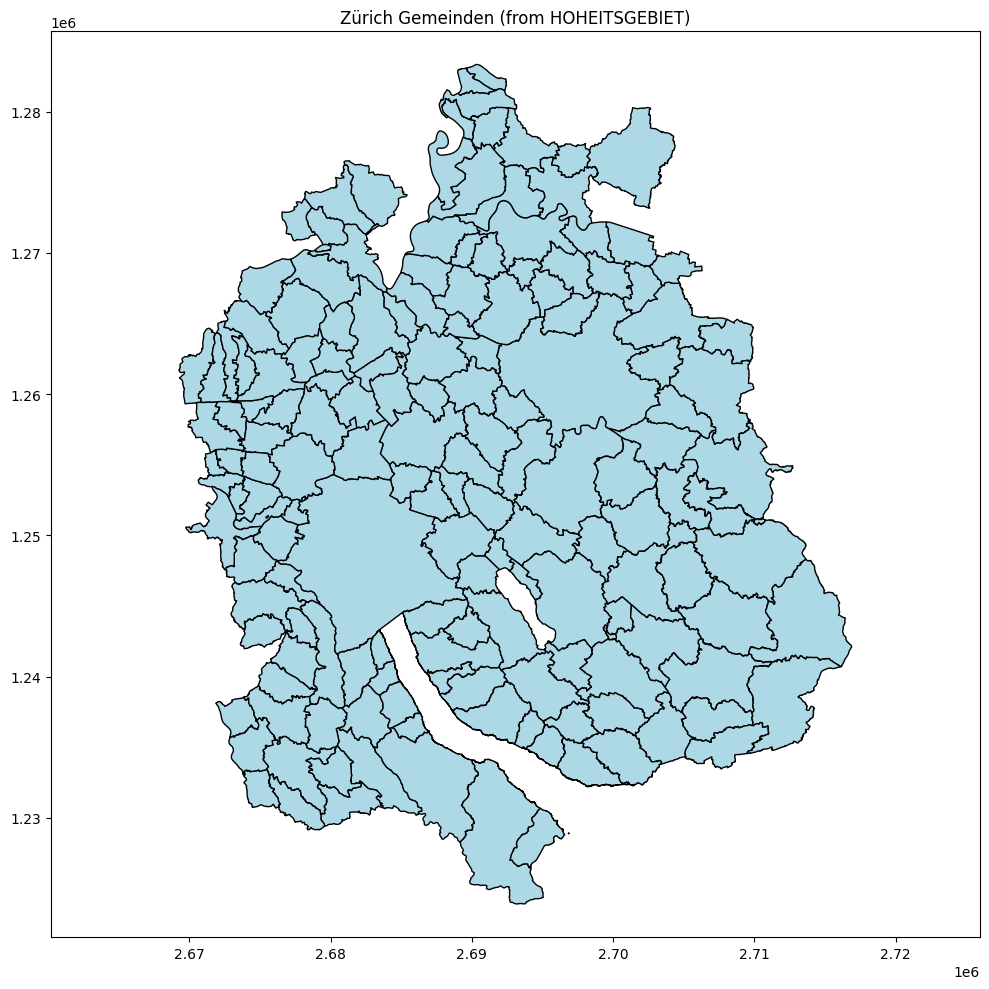

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
zh_gemeinden.plot(ax=ax, edgecolor="black", facecolor="lightblue")
plt.title("Zürich Gemeinden (from HOHEITSGEBIET)")
plt.axis("equal")
plt.tight_layout()
plt.show()